In [1]:
import numpy as np
import matplotlib.pyplot as  plt
import os

from datetime import datetime
import h5py

# from Tools.plot import plot
from multiprocessing import Pool, cpu_count

from qTools import *


# Define Parameters

In [2]:
wC = 1.
# wQ: sweepable
# g: sweepable

quench = 5/wC
tau = 10e-3

steps = int(quench/tau)
print(steps)

500


# Define sweep lists

In [3]:
wQ_wC = np.linspace(10, 50, 20)
wQ = wQ_wC * wC

g_gc = np.linspace(0, 2, steps)

g = []
for wQi in wQ:
    gc = np.sqrt(wQi*wC)/2
    g.append(g_gc*gc)

# Create System

In [4]:
system = QuantumSystem()
qub = Qubit(frequency=0)
cav = Cavity(dimension=60, frequency=wC/2)
coupling = system.JC(qub, cav, None)
system.add(qub, cav)

Qubit requires a dimension
Cavity requires a dimension


# Create Protocol

In [5]:
protocol = qProtocol(superSys=system)
JC = freeEvolution(ratio=0.5, superSys=system)
AJC = freeEvolution(superSys=system)
qubset = JC.createUpdate(system=qub, key='frequency')
X = xGate(implementation='instant', superSys=qub, fixed=True)
protocol.addStep(JC, X, AJC ,X, JC)

# Define Simulation & Sweeps

In [6]:
sim = Simulation()
sim.stepSize = tau
system.initialState = [1,0]
sim.delStates = True
sim.addQSystems(system, protocol)
gSweep = sim.timeDependency.createSweep(system=coupling, sweepKey='couplingStrength')
wQSweep = sim.Sweep.createSweep(system=qubset, sweepKey='value', sweepList=wQ)
asdasd = sim.Sweep.createSweep(system=gSweep,sweepKey='sweepList',sweepList=g)

# Define results function

In [7]:
n = cav.freeMat
def expect(qSim, state):
    qSim.qRes.results['cavParity'].append(expectationKet(n, state))

sim.compute = expect

# Run simulation

In [8]:
sim.run(p=True, coreCount='all')

here


# Plot

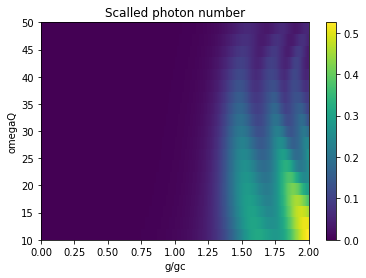

In [9]:
norm = []
ones = np.ones(g_gc.size)
for wQi in wQ:
    norm.append(ones * cav.frequency/wQi)
norm = np.array(norm)
    
Y, X = np.meshgrid(g_gc, wQ)
fig = plt.figure()
surf = plt.pcolormesh(Y, X, norm*sim.qRes.results['cavParity'])
plt.colorbar(surf)
plt.xlabel('g/gc')
plt.ylabel(r'omegaQ')
plt.title('Scalled photon number')

plt.show()